# Set up

In [76]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import scipy.stats as stats
from scipy.stats.mstats import winsorize

IMAGES_PATH="./Figs/"
dpi=300
sizeOfFont=20
linewidth=2
font = {'family':'Helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': sizeOfFont,
        }
ticks_font = font_manager.FontProperties(family='Helvetica', style='normal',
    size=sizeOfFont, weight='normal', stretch='normal')
fontdict={'family':'Helvetica', 'size':'14'}

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=dpi):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

This dataset was collected from the World Health Organization (WHO) data repository website, with its corresponding economic data collected from the United Nation website, and is composed of data related to life expectancy and multiple other health factors for 193 countries from 2000-2015.
Data source: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [49]:
def load_data(data_path):
    csv_path = os.path.join(data_path, "Life_Expectancy_Data.csv")
    return pd.read_csv(csv_path)

In [50]:
DATA_PATH="./"
life = load_data(DATA_PATH)

In [51]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


# Basic data description

In [52]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

22 variables in total, 3 categorical values: country, year, status

In [53]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Saving figure attribute_histogram_plots


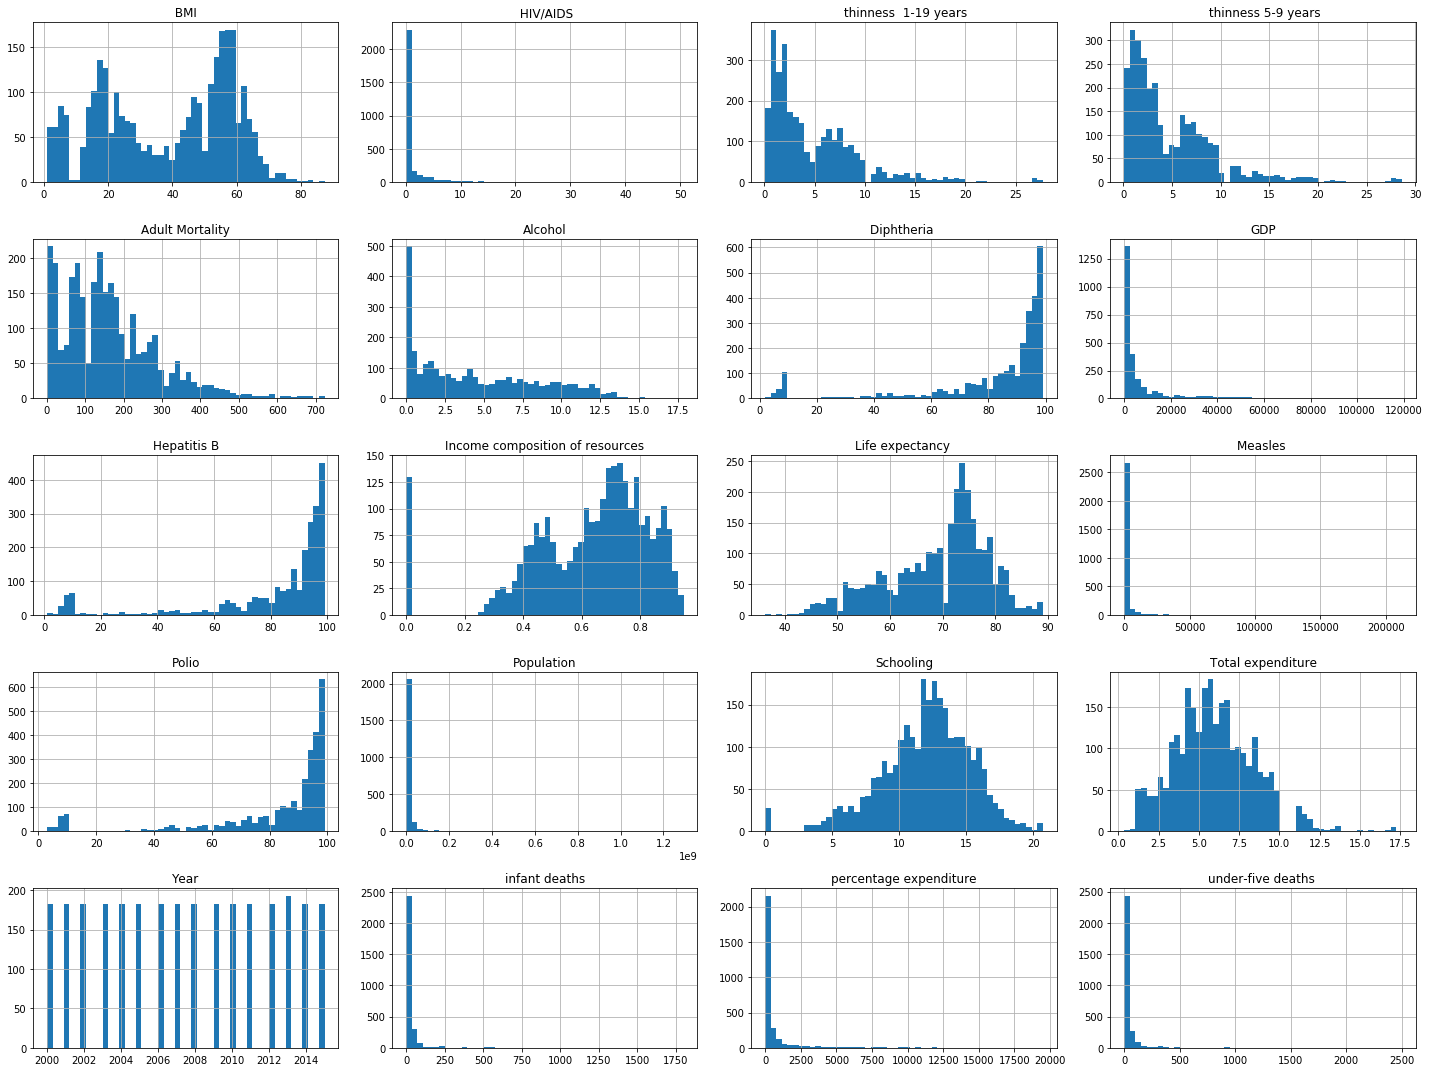

In [54]:
%matplotlib inline
life.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

Few variables do not make sense:
1. measles - number of reported Measles cases per 1000 population:

But lots of values are larger than 1000

After comparison, this is total number of cases

2. percentage expenditure - lots of them are larger than 100

# Data cleaning

## Missing data

In [55]:
missing_values_count = life.isnull().sum() / len(life) * 100
missing_values_count

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

Based on the info summary, there are missing data in many variables, except Country, Year, Status, infant deaths, percentage expenditure, Measles, under-five deaths, HIV/AIDS. Since the percent of missing data is 22% at most, I decide to keep all the variables and fill the missing values.

In [56]:
# percent of total data is missing
total_cells = np.product(life.shape)
total_missing = missing_values_count.sum()
(total_missing / total_cells) * 100

0.1349653677707799

Around 0.13% data is missing

## Choice 1: Filling in missing values using median values

In [27]:
from sklearn.preprocessing import Imputer as SimpleImputer
imputer = SimpleImputer(strategy="median")

In [33]:
#split numerical and categorical values
life_num = life.drop(["Country", "Year", "Status"], axis=1)
life_cat = life[["Country", "Year", "Status"]]

In [31]:
life_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-null float64
Population                         2286 non-null float64
 thinness  1-19 years              2904 non-

In [34]:
life_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 3 columns):
Country    2938 non-null object
Year       2938 non-null int64
Status     2938 non-null object
dtypes: int64(1), object(2)
memory usage: 68.9+ KB


In [36]:
life_num_fill = imputer.fit_transform(life_num)

In [37]:
life_num_tr = pd.DataFrame(life_num_fill, columns=life_num.columns, index=life_num.index)

In [57]:
life.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Choice 2: Filling in missing data by the median value of each year

In [58]:
imputed_life = []
for year in list(life.Year.unique()):
    year_data = life[life.Year == year]
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_life.append(year_data)

/Users/jiangyanfeng/anaconda/envs/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
imputed_life_data = pd.concat(imputed_life).copy()

In [64]:
imputed_life_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null

In [176]:
# save imputed data
imputed_life_data.to_csv("./Life_Expectancy_Data_imputed.csv")

In [181]:
imputed_life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.238462,164.695031,30.303948,4.637600,738.251295,82.644656,2419.592240,38.386555,42.035739,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,4.613841,9.510459,124.092441,117.926501,3.921306,1987.914858,22.881890,11467.272489,19.939693,160.445548,23.362728,2.416410,23.649290,5.077785,13284.996285,5.402084e+07,4.397466,4.485674,0.205378,3.267787
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.082500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,4.100000,64.912906,91.000000,17.000000,43.450000,4.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Outliers detection

Saving figure attribute_box_plots_imputed


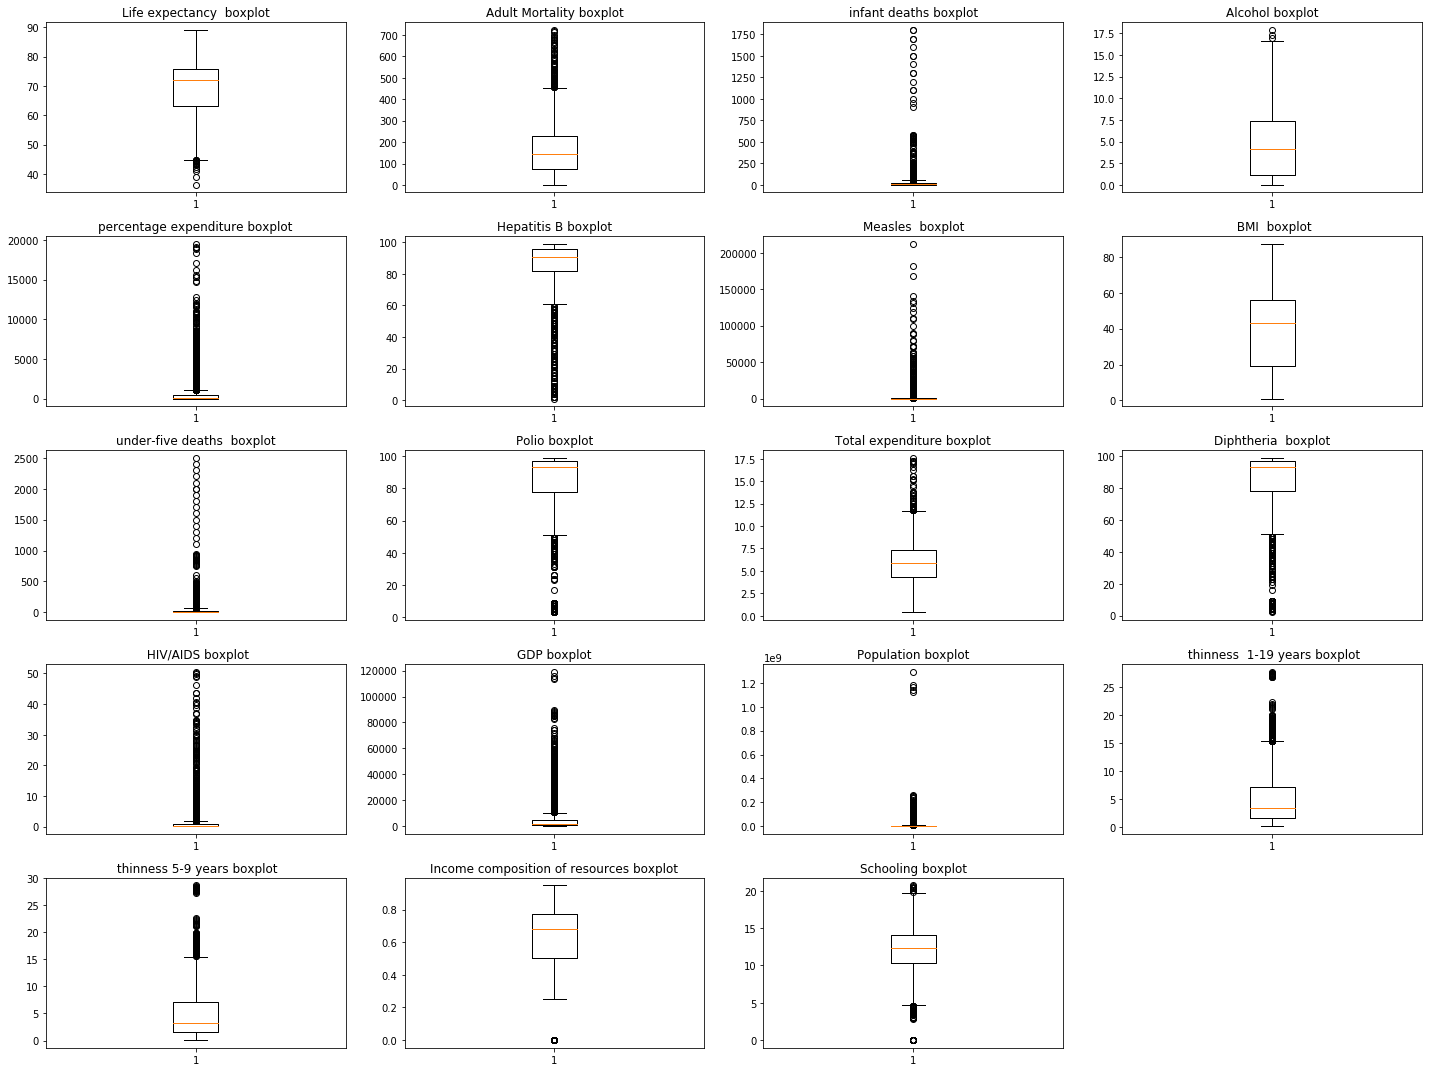

In [417]:
num_vars = list(imputed_life_data.columns)[3:]
def plot_outliers(data):
    plt.figure(figsize=(20,15))
    i = 0
    for col in num_vars:
        i += 1
        plt.subplot(5, 4, i)
        plt.boxplot(data[col])
        plt.title("{} boxplot".format(col))
plot_outliers(imputed_life_data)
save_fig("attribute_box_plots_imputed")
plt.show()

In [418]:
# Calculate number and percentage of outliers
def outlier_count(col, data=imputed_life_data):
    print(15*"-" + col + 15*"-")
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - iqr*1.5
    max_val = q75 + iqr*1.5
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col]) * 100, 2)
    print("Number of outliers: {}".format(outlier_count))
    print("Percent of outliers: {}%".format(outlier_percent))

In [419]:
for col in num_vars:
    outlier_count(col)

---------------Life expectancy ---------------
Number of outliers: 17
Percent of outliers: 0.58%
---------------Adult Mortality---------------
Number of outliers: 86
Percent of outliers: 2.93%
---------------infant deaths---------------
Number of outliers: 315
Percent of outliers: 10.72%
---------------Alcohol---------------
Number of outliers: 3
Percent of outliers: 0.1%
---------------percentage expenditure---------------
Number of outliers: 389
Percent of outliers: 13.24%
---------------Hepatitis B---------------
Number of outliers: 322
Percent of outliers: 10.96%
---------------Measles ---------------
Number of outliers: 542
Percent of outliers: 18.45%
--------------- BMI ---------------
Number of outliers: 0
Percent of outliers: 0.0%
---------------under-five deaths ---------------
Number of outliers: 394
Percent of outliers: 13.41%
---------------Polio---------------
Number of outliers: 279
Percent of outliers: 9.5%
---------------Total expenditure---------------
Number of outlie

There is a large amount of outliers. 

## Dealing with outliers by Winsorizing the data

In [422]:
def wins_outliers(col, data = imputed_life_data, lower_limit = 0, upper_limit = 0, show_plot = True):
    wins_data = winsorize(data[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot:
        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.boxplot(data[col])
        plt.title("original {}".format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title("wins=({}, {}) {}".format(lower_limit, upper_limit, col))
        #plt.show()        

Saving figure attribute_box_plots_comp_wins1


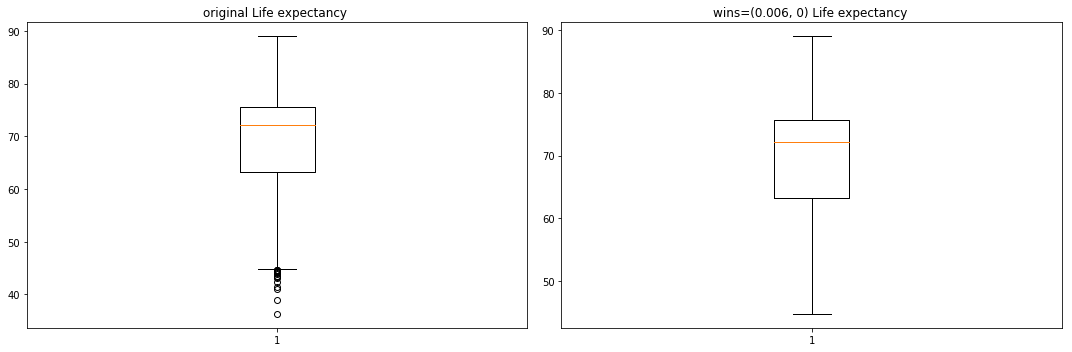

Saving figure attribute_box_plots_comp_wins2


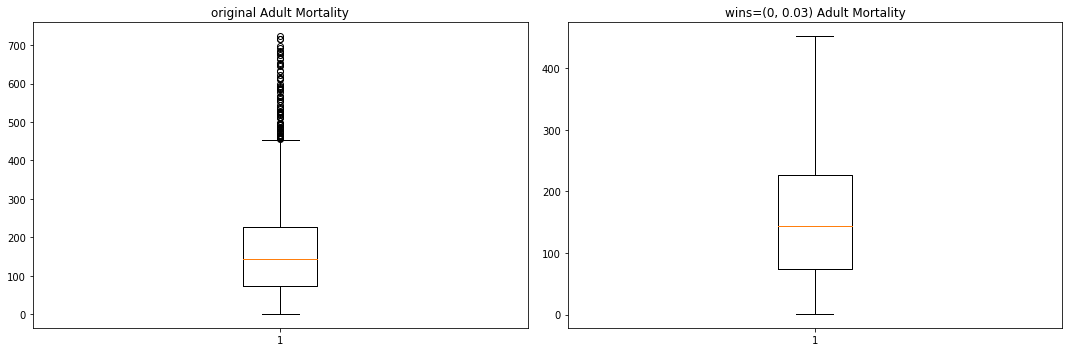

Saving figure attribute_box_plots_comp_wins3


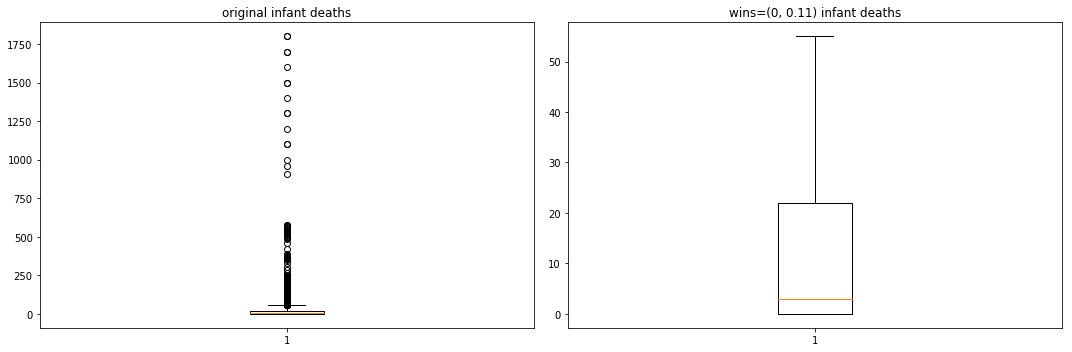

Saving figure attribute_box_plots_comp_wins4


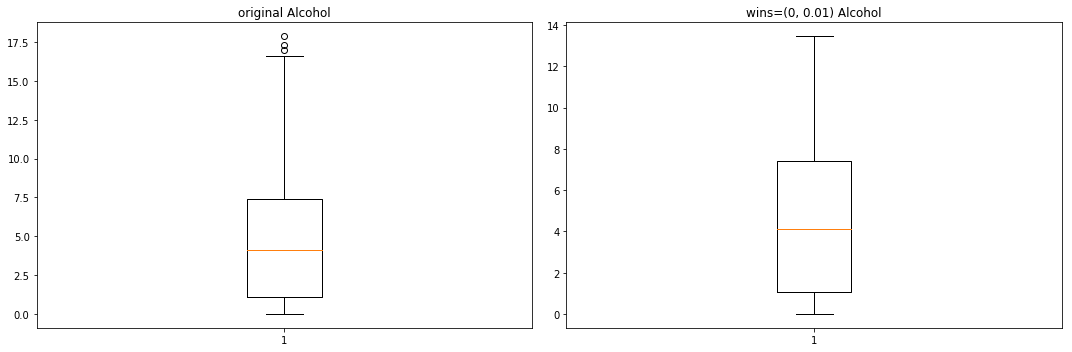

Saving figure attribute_box_plots_comp_wins5


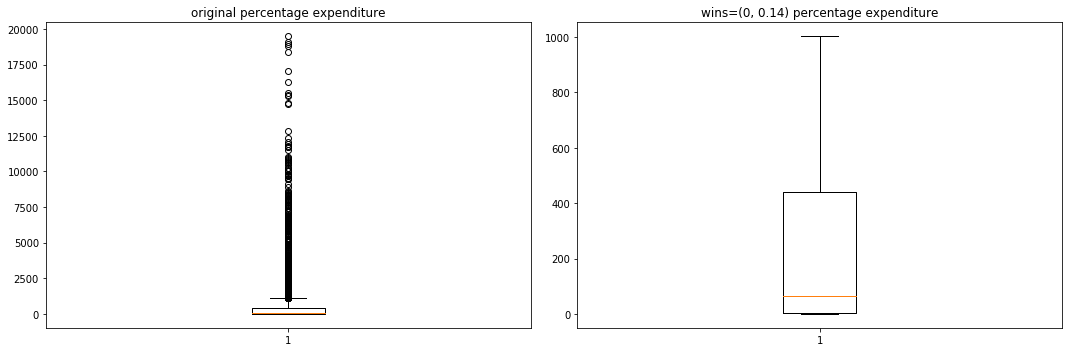

Saving figure attribute_box_plots_comp_wins6


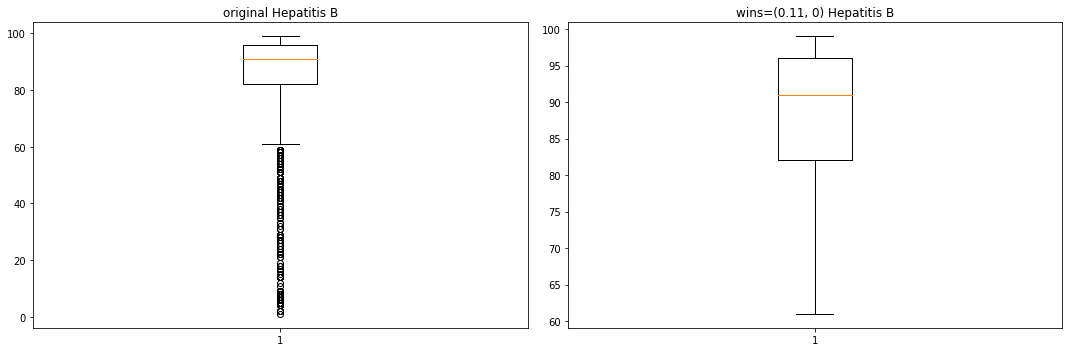

Saving figure attribute_box_plots_comp_wins7


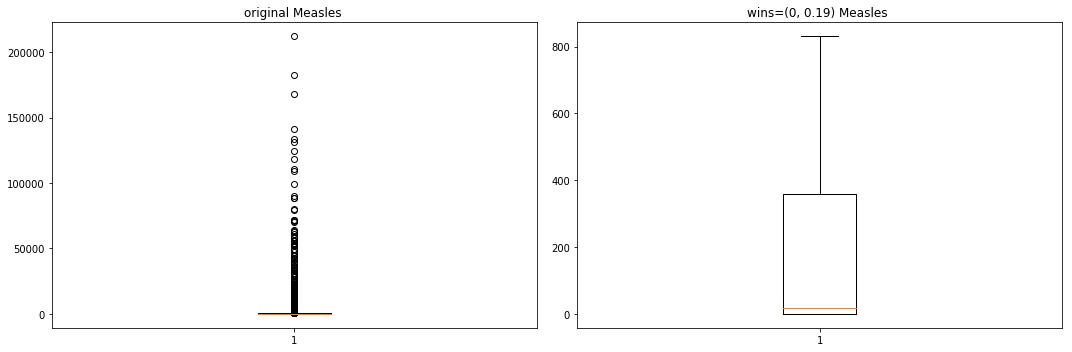

Saving figure attribute_box_plots_comp_wins8


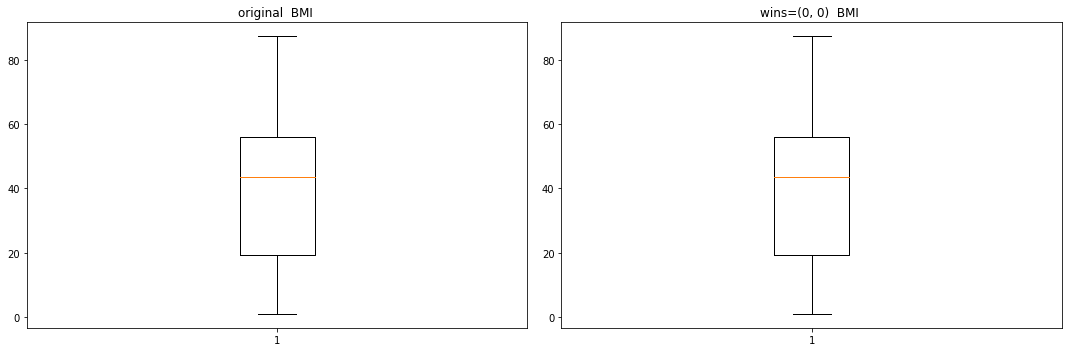

Saving figure attribute_box_plots_comp_wins9


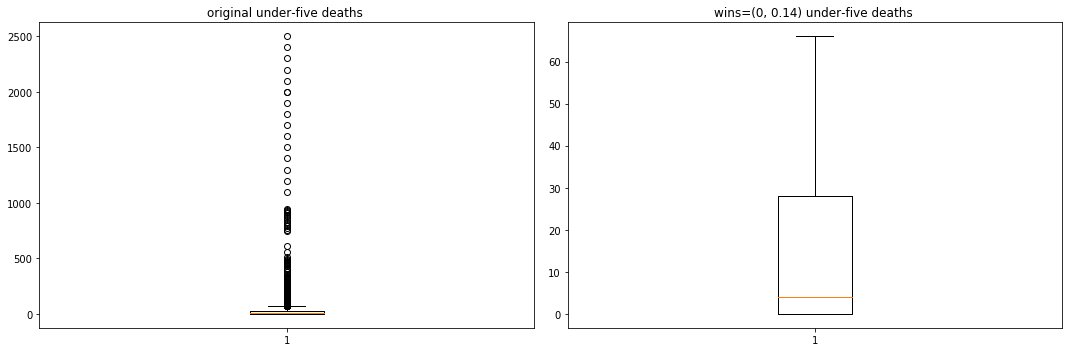

Saving figure attribute_box_plots_comp_wins10


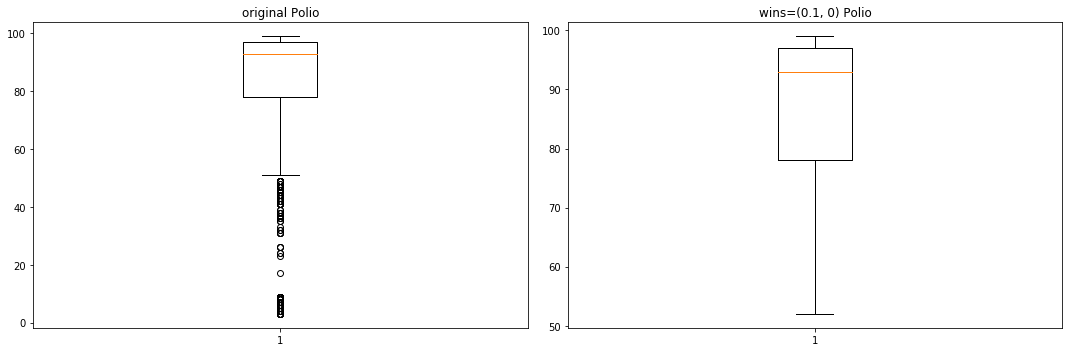

Saving figure attribute_box_plots_comp_wins11


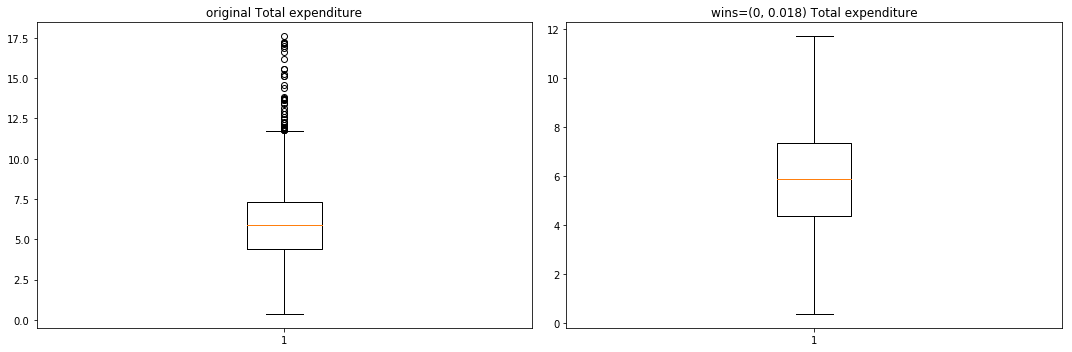

Saving figure attribute_box_plots_comp_wins12


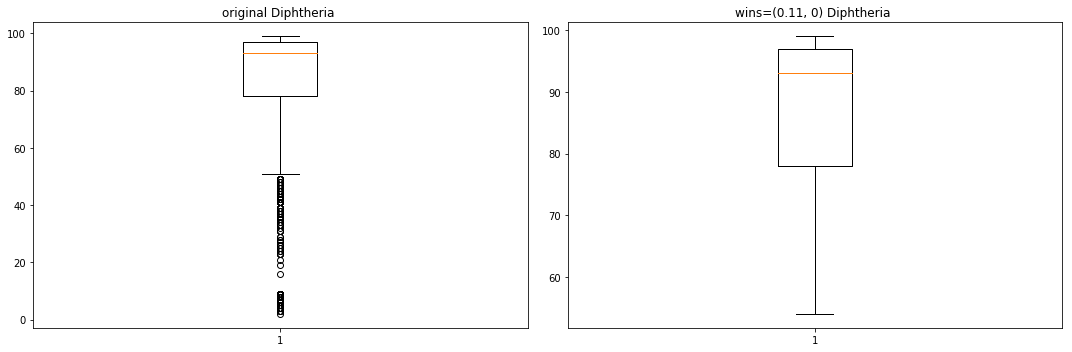

Saving figure attribute_box_plots_comp_wins13


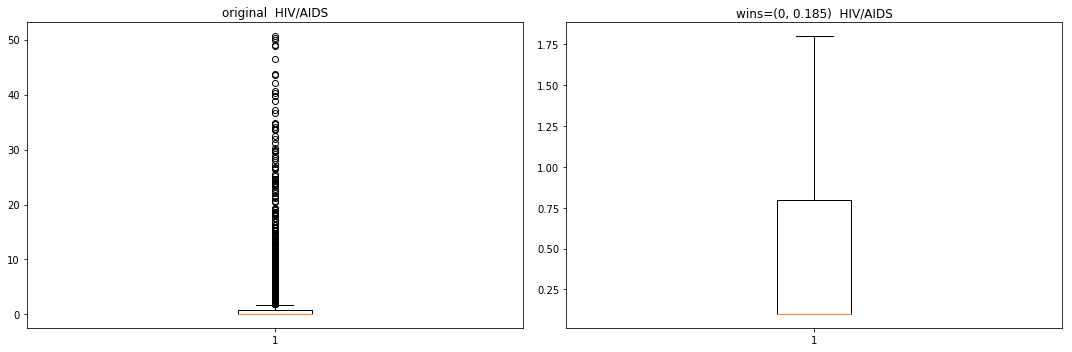

Saving figure attribute_box_plots_comp_wins14


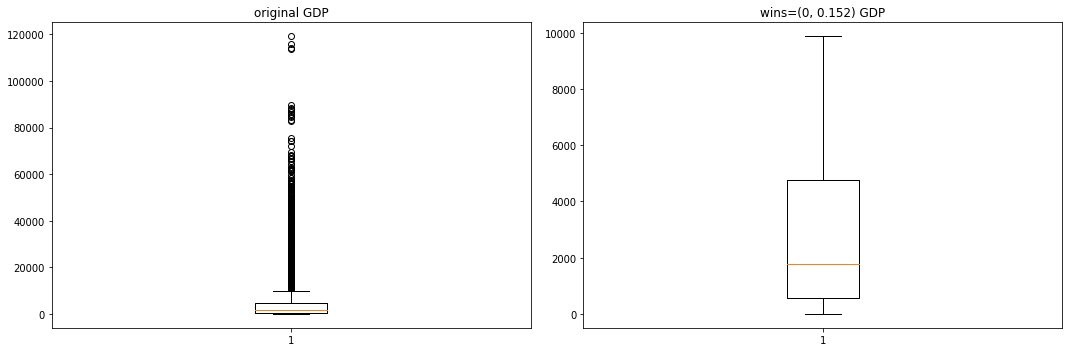

Saving figure attribute_box_plots_comp_wins15


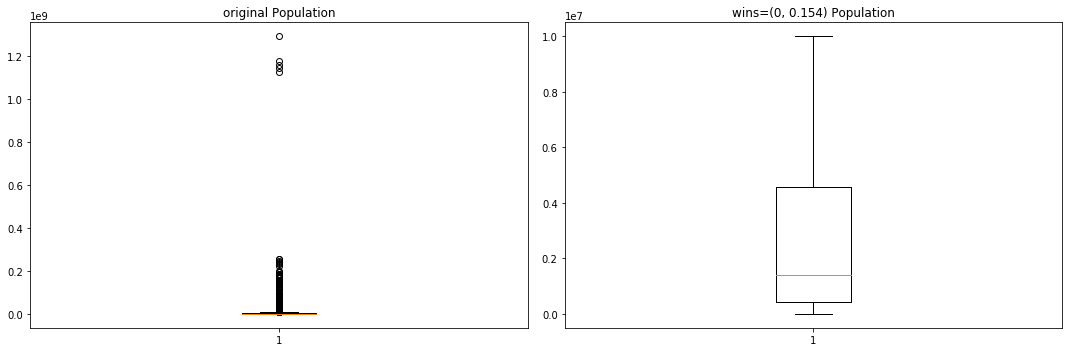

Saving figure attribute_box_plots_comp_wins16


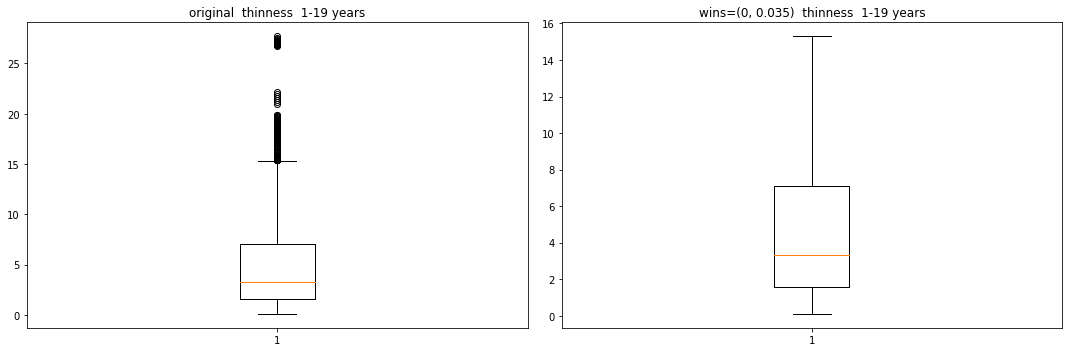

Saving figure attribute_box_plots_comp_wins17


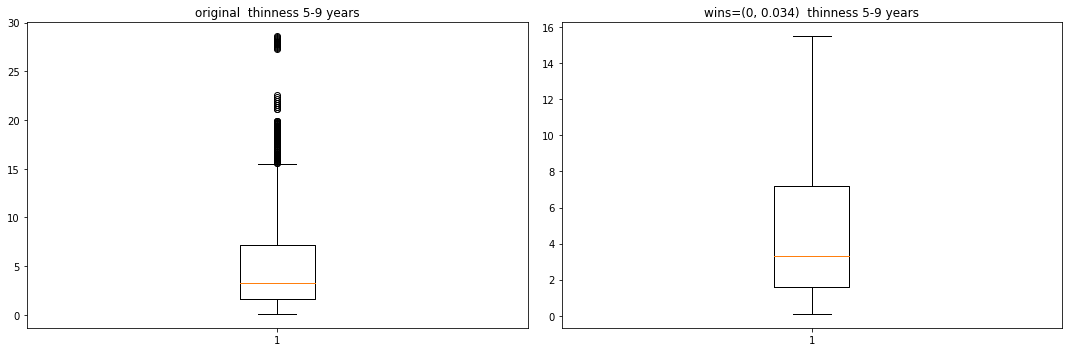

Saving figure attribute_box_plots_comp_wins18


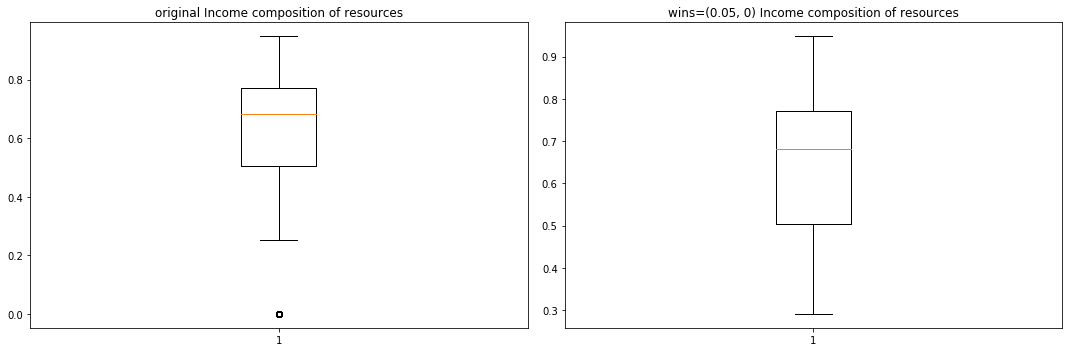

Saving figure attribute_box_plots_comp_wins19


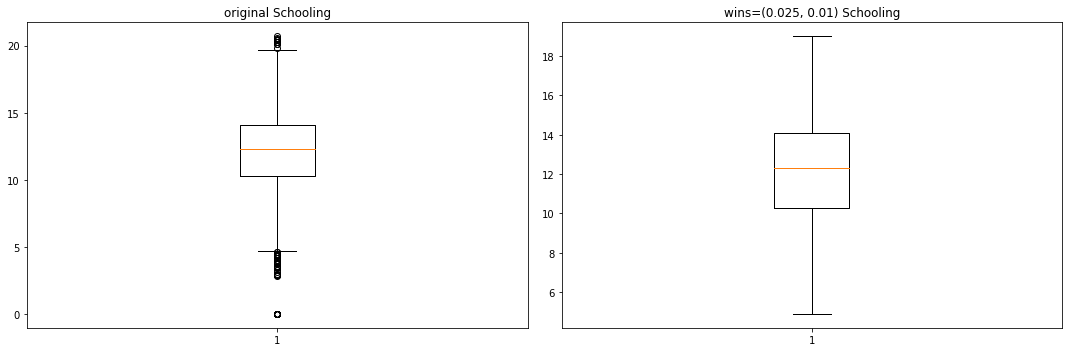

In [423]:
wins_dict = {}
wins_outliers(num_vars[0], lower_limit=0.006)
save_fig("attribute_box_plots_comp_wins1")
plt.show()
wins_outliers(num_vars[1], upper_limit=0.03)
save_fig("attribute_box_plots_comp_wins2")
plt.show()
wins_outliers(num_vars[2], upper_limit=0.11)
save_fig("attribute_box_plots_comp_wins3")
plt.show()
wins_outliers(num_vars[3], upper_limit=0.01)
save_fig("attribute_box_plots_comp_wins4")
plt.show()
wins_outliers(num_vars[4], upper_limit=0.14)
save_fig("attribute_box_plots_comp_wins5")
plt.show()
wins_outliers(num_vars[5], lower_limit=0.11)
save_fig("attribute_box_plots_comp_wins6")
plt.show()
wins_outliers(num_vars[6], upper_limit=0.19)
save_fig("attribute_box_plots_comp_wins7")
plt.show()
wins_outliers(num_vars[7])
save_fig("attribute_box_plots_comp_wins8")
plt.show()
wins_outliers(num_vars[8], upper_limit=0.14)
save_fig("attribute_box_plots_comp_wins9")
plt.show()
wins_outliers(num_vars[9], lower_limit=0.10)
save_fig("attribute_box_plots_comp_wins10")
plt.show()
wins_outliers(num_vars[10], upper_limit=0.018)
save_fig("attribute_box_plots_comp_wins11")
plt.show()
wins_outliers(num_vars[11], lower_limit=0.11)
save_fig("attribute_box_plots_comp_wins12")
plt.show()
wins_outliers(num_vars[12], upper_limit=0.185)
save_fig("attribute_box_plots_comp_wins13")
plt.show()
wins_outliers(num_vars[13], upper_limit=0.152)
save_fig("attribute_box_plots_comp_wins14")
plt.show()
wins_outliers(num_vars[14], upper_limit=0.154)
save_fig("attribute_box_plots_comp_wins15")
plt.show()
wins_outliers(num_vars[15], upper_limit=0.035)
save_fig("attribute_box_plots_comp_wins16")
plt.show()
wins_outliers(num_vars[16], upper_limit=0.034)
save_fig("attribute_box_plots_comp_wins17")
plt.show()
wins_outliers(num_vars[17], lower_limit=0.05)
save_fig("attribute_box_plots_comp_wins18")
plt.show()
wins_outliers(num_vars[18], lower_limit=0.025, upper_limit=0.01)
save_fig("attribute_box_plots_comp_wins19")
plt.show()

All the variables have now been winsorized as little as possible in order to keep the data while limiting the outliers.

In [187]:
len(num_vars)

19

Saving figure attribute_box_plots_imputed_wins


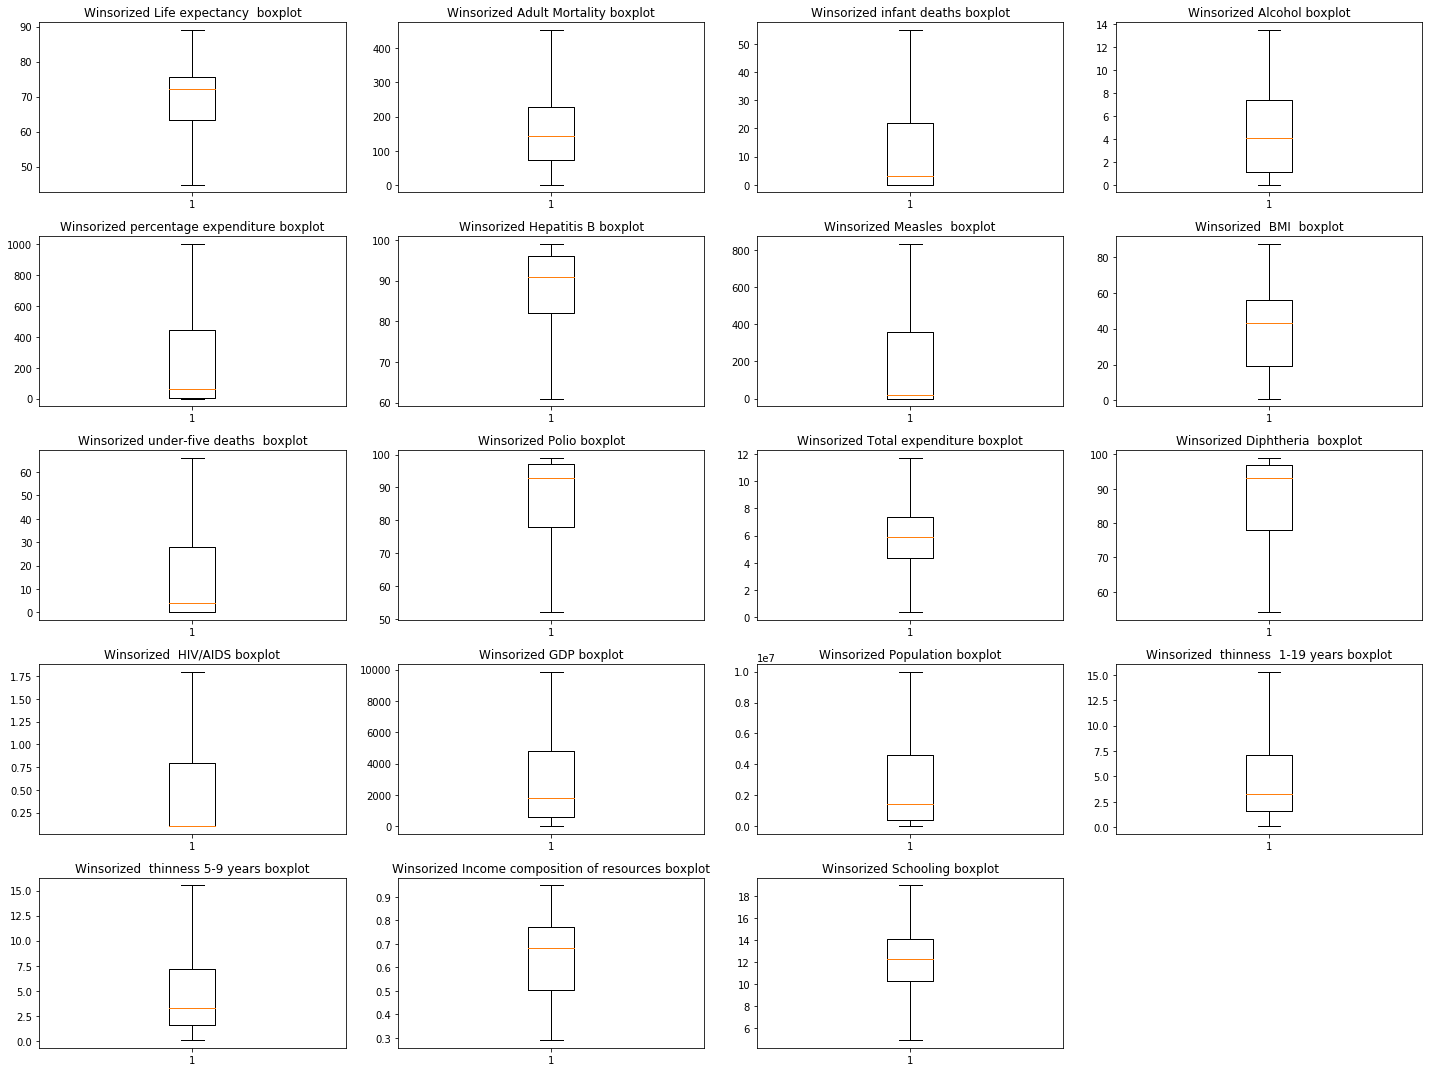

In [188]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_vars):
    plt.subplot(5, 4, i+1)
    plt.boxplot(wins_dict[col])
    plt.title("Winsorized {} boxplot".format(col))
plt.tight_layout()
save_fig("attribute_box_plots_imputed_wins")
plt.show()

In [189]:
# combine winsorized values to dataframe
wins_life = imputed_life_data.iloc[:, 0:3]
for col in num_vars:
    wins_life[col] = wins_dict[col]

In [190]:
wins_life.to_csv("./Life_Expectancy_Data_imputed_wins.csv")

In [192]:
wins_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,55,0.010,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,9999617.0,15.3,15.5,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.600,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,5.285,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,9999617.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,55,5.285,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,5.285,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,9875.161736,2076086.0,3.3,3.3,0.784,13.9


## Drop measles and percentage expenditure

In [193]:
wins_life_mea = wins_life.drop("Measles ", axis=1)
wins_life_mea_perexp = wins_life_mea.drop("percentage expenditure", axis=1)

In [194]:
wins_life_mea_perexp.to_csv("./Life_Expectancy_Data_imputed_wins_perexp.csv")

## Visualize the final destribution and outliers

Saving figure attribute_box_plots_final


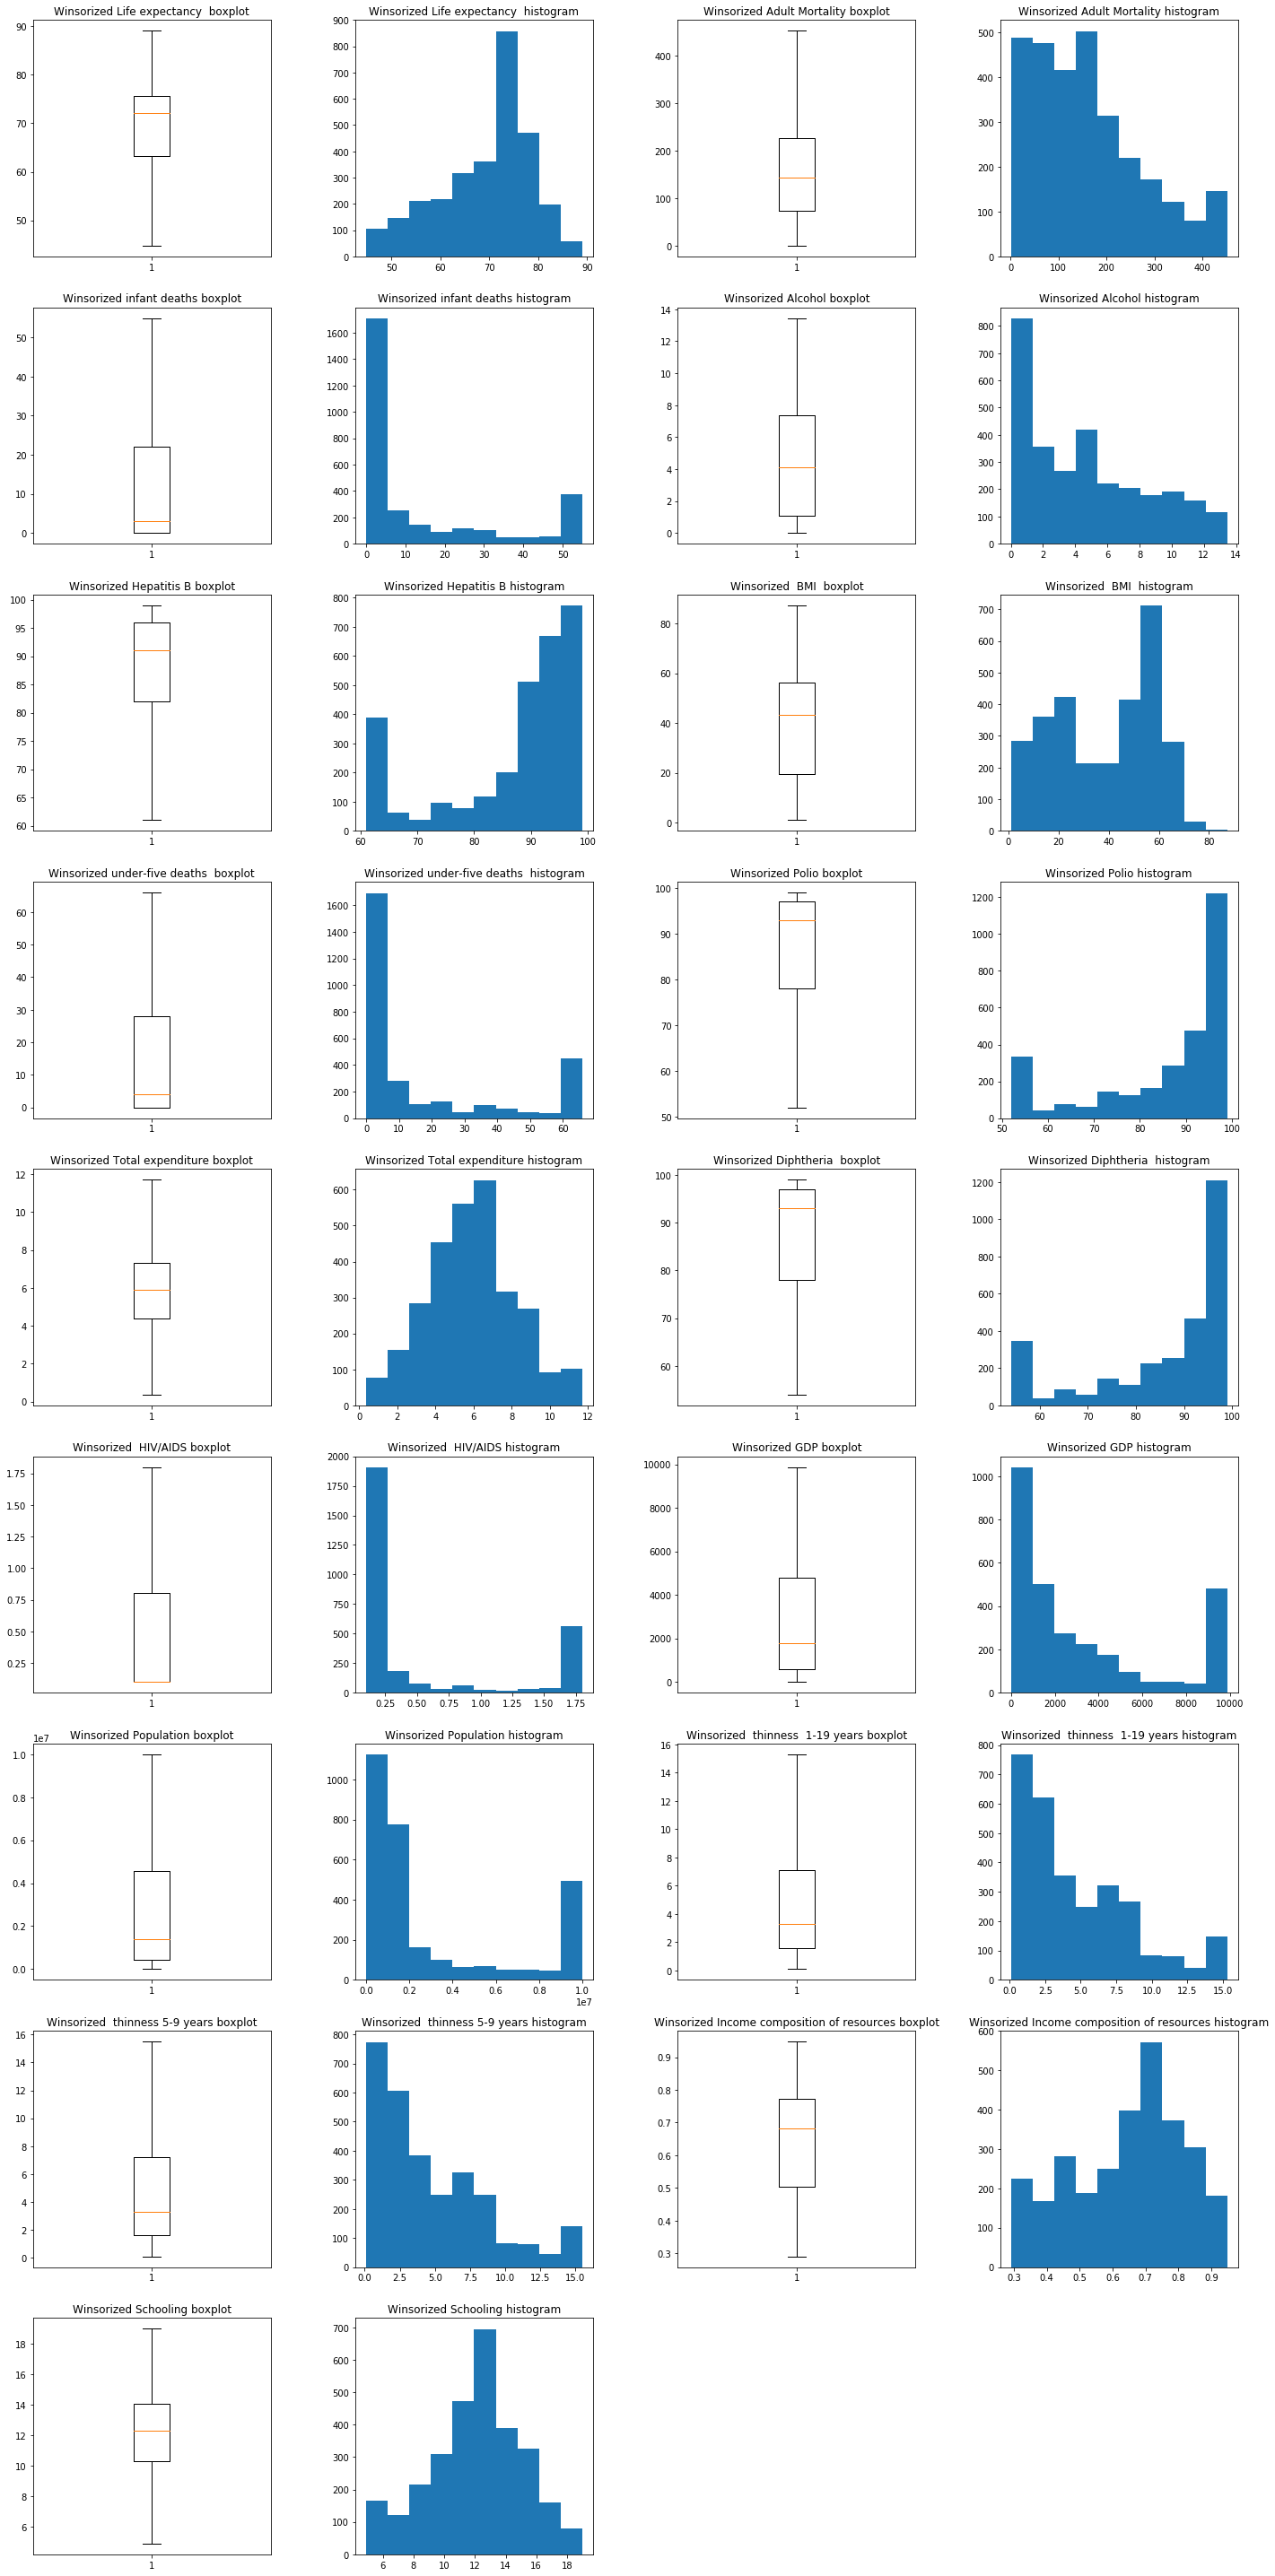

In [197]:
num_vars = list(wins_life_mea_perexp.columns)[3:]
def plot_outliers(data):
    plt.figure(figsize=(20,40))
    i = 0
    for col in num_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title("Winsorized {} boxplot".format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('Winsorized {} histogram'.format(col))
plot_outliers(wins_life_mea_perexp)
save_fig("attribute_box_plots_final")
plt.show()

From the distribution plots:
Winsorized life expectancy, Winsorized total expenditure histogram, Winsorized income composition of resources, and Winsorized schooling seem to be normally distributed.

# Clustering analysis 

Based on all the numeric variables except life expectancy

## Split the data into numeric and categorical parts

In [210]:
data = wins_life_mea_perexp
data_num = data.iloc[:, 3:]
data_cat = data.iloc[:, :3]

In [212]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 17 columns):
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
Hepatitis B                        2938 non-null float64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null float64
Population                         2938 non-null float64
 thinness  1-19 years              2938 non-null float64
 thinness 5-9 years                2938 non-null float64
Income composition of resources    2938 no

In [213]:
data_cat.describe(include=["O"])

,Country,Status
count,2938,2938
unique,193,2
top,Sweden,Developing
freq,16,2426


In [262]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Scale the data

In [264]:
data_num.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [266]:
data_num_drop = data_num.drop(columns="Life expectancy ")

In [267]:
scaler = StandardScaler()
data_num_drop_scaled = scaler.fit_transform(data_num_drop)

## Using Elbow method to find the optimal number of clusters

In [270]:
k_range = np.arange(1, 51, 1)
kmeans_per_k = [KMeans(n_clusters=k).fit(data_num_drop_scaled) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure kmeans_elbow


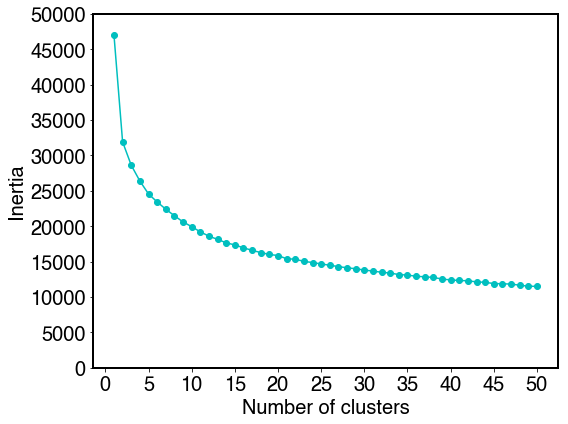

In [282]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, "co-")
ax=plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_yticks(np.arange(0, 55000, 5000))
ax.set_xticks(np.arange(0, 55, 5))
ax.set_ylabel('Inertia', fontdict=font)
ax.set_xlabel('Number of clusters', fontdict=font)
save_fig("kmeans_elbow")
plt.show()

Based on the above graph, we choose k = 5

## Build the kMeans model with optimal number of clusters

In [278]:
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(data_num_drop_scaled)

In [279]:
y_pred

array([4, 3, 3, ..., 4, 4, 4], dtype=int32)

In [280]:
data_num_labeled = data_num.copy()
data_num_labeled["Label"] = y_pred

In [281]:
data_num_labeled.to_csv("./Life_Expectancy_Data_kmeans_labeled_num.csv")

In [283]:
data_num_labeled.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Label'],
      dtype='object')

## Compare the life expectancy among different clusters

In [305]:
life_exp = []
for label in range(k):
    group = data_num_labeled[data_num_labeled["Label"] == label]["Life expectancy "]
    life_exp.append(group)

In [405]:
np.shape(life_exp[1])

(401,)

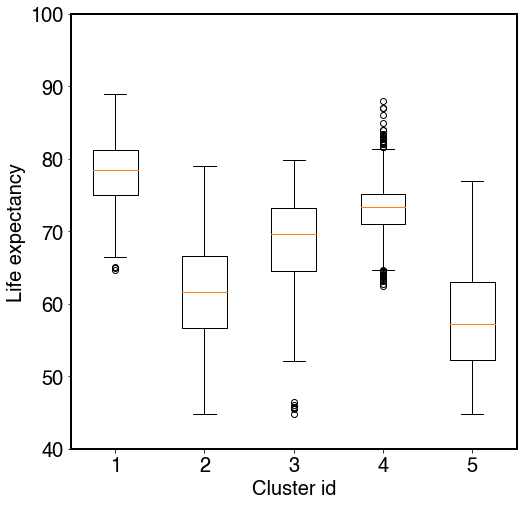

In [306]:
plt.figure(figsize=(8,8))
plt.boxplot(life_exp)
ax=plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_yticks(np.arange(40, 110, 10))
ax.set_ylabel('Life expectancy', fontdict=font)
ax.set_xlabel('Cluster id', fontdict=font)

#save_fig("kmeans_life_exp_cluster")
plt.show()

In [301]:
round(data_num_labeled[["Label", "Life expectancy "]].groupby(["Label"]).describe(), 2)

Life expectancy                                            
                 count   mean   std   min   25%   50%   75%   max
Label                                                            
0                735.0  78.20  4.31  64.6  75.0  78.5  81.2  89.0
1                401.0  61.73  7.72  44.8  56.6  61.7  66.6  79.0
2                349.0  68.45  6.46  44.8  64.5  69.7  73.2  79.9
3                892.0  72.96  3.95  62.4  71.0  73.3  75.2  88.0
4                561.0  57.50  6.87  44.8  52.2  57.2  63.0  77.0

cluster 1, 5 tends to have the highest and lowest life expectancy

In [327]:
cluster_summary = round(data_num_labeled[data_num_labeled.columns].groupby(["Label"]).mean(), 2)

In [312]:
cluster_summary.to_csv("./cluster_summary_k_5.csv")

In [333]:
cluster_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 17 columns):
Life expectancy                    5 non-null float64
Adult Mortality                    5 non-null float64
infant deaths                      5 non-null float64
Alcohol                            5 non-null float64
Hepatitis B                        5 non-null float64
 BMI                               5 non-null float64
under-five deaths                  5 non-null float64
Polio                              5 non-null float64
Total expenditure                  5 non-null float64
Diphtheria                         5 non-null float64
 HIV/AIDS                          5 non-null float64
GDP                                5 non-null float64
Population                         5 non-null float64
 thinness  1-19 years              5 non-null float64
 thinness 5-9 years                5 non-null float64
Income composition of resources    5 non-null float64
Schooling                          

In [414]:
cluster_summary

,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Label,,,,,,,,,,,,,,,,,
0,78.20,90.52,2.16,9.34,89.81,53.89,2.53,93.99,7.49,94.06,0.11,6594.55,3274128.95,1.50,1.47,0.82,15.36
1,61.73,241.88,9.15,2.89,88.54,20.00,12.96,84.46,5.66,85.03,1.16,1476.37,1578647.05,9.15,9.20,0.49,9.86
2,68.45,154.17,7.17,3.31,72.62,44.04,9.11,69.74,5.74,70.21,0.48,1974.34,2207678.44,2.99,2.99,0.58,11.01
3,72.96,123.46,7.05,3.44,94.39,43.46,8.37,95.40,5.46,94.96,0.18,3403.68,2406061.38,3.80,3.74,0.69,12.76
4,57.50,263.60,46.36,2.38,77.48,19.63,59.66,69.62,5.15,70.42,1.20,982.32,5386261.99,8.14,8.32,0.48,8.89


## Significance test of the difference (Paired student's t-test)

In [408]:
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

In [409]:
# compare pair-wise clusters
for i in range(k-1):
    for j in range(i+1, k):
        data1, data2 = life_exp[i], life_exp[j]
        stat, p = f_oneway(data1, data2)
        print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2130.122, p=0.000
Statistics=863.789, p=0.000
Statistics=651.335, p=0.000
Statistics=4399.499, p=0.000
Statistics=164.530, p=0.000
Statistics=1196.075, p=0.000
Statistics=79.936, p=0.000
Statistics=223.048, p=0.000
Statistics=572.076, p=0.000
Statistics=2964.061, p=0.000


In [413]:
# compare all the clusters
stat, p = f_oneway(life_exp[0], life_exp[1], life_exp[2], life_exp[3], life_exp[4])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1362.620, p=0.000


## Characteristics of different clusters

Saving figure kmeans_cluster_attributes_comp


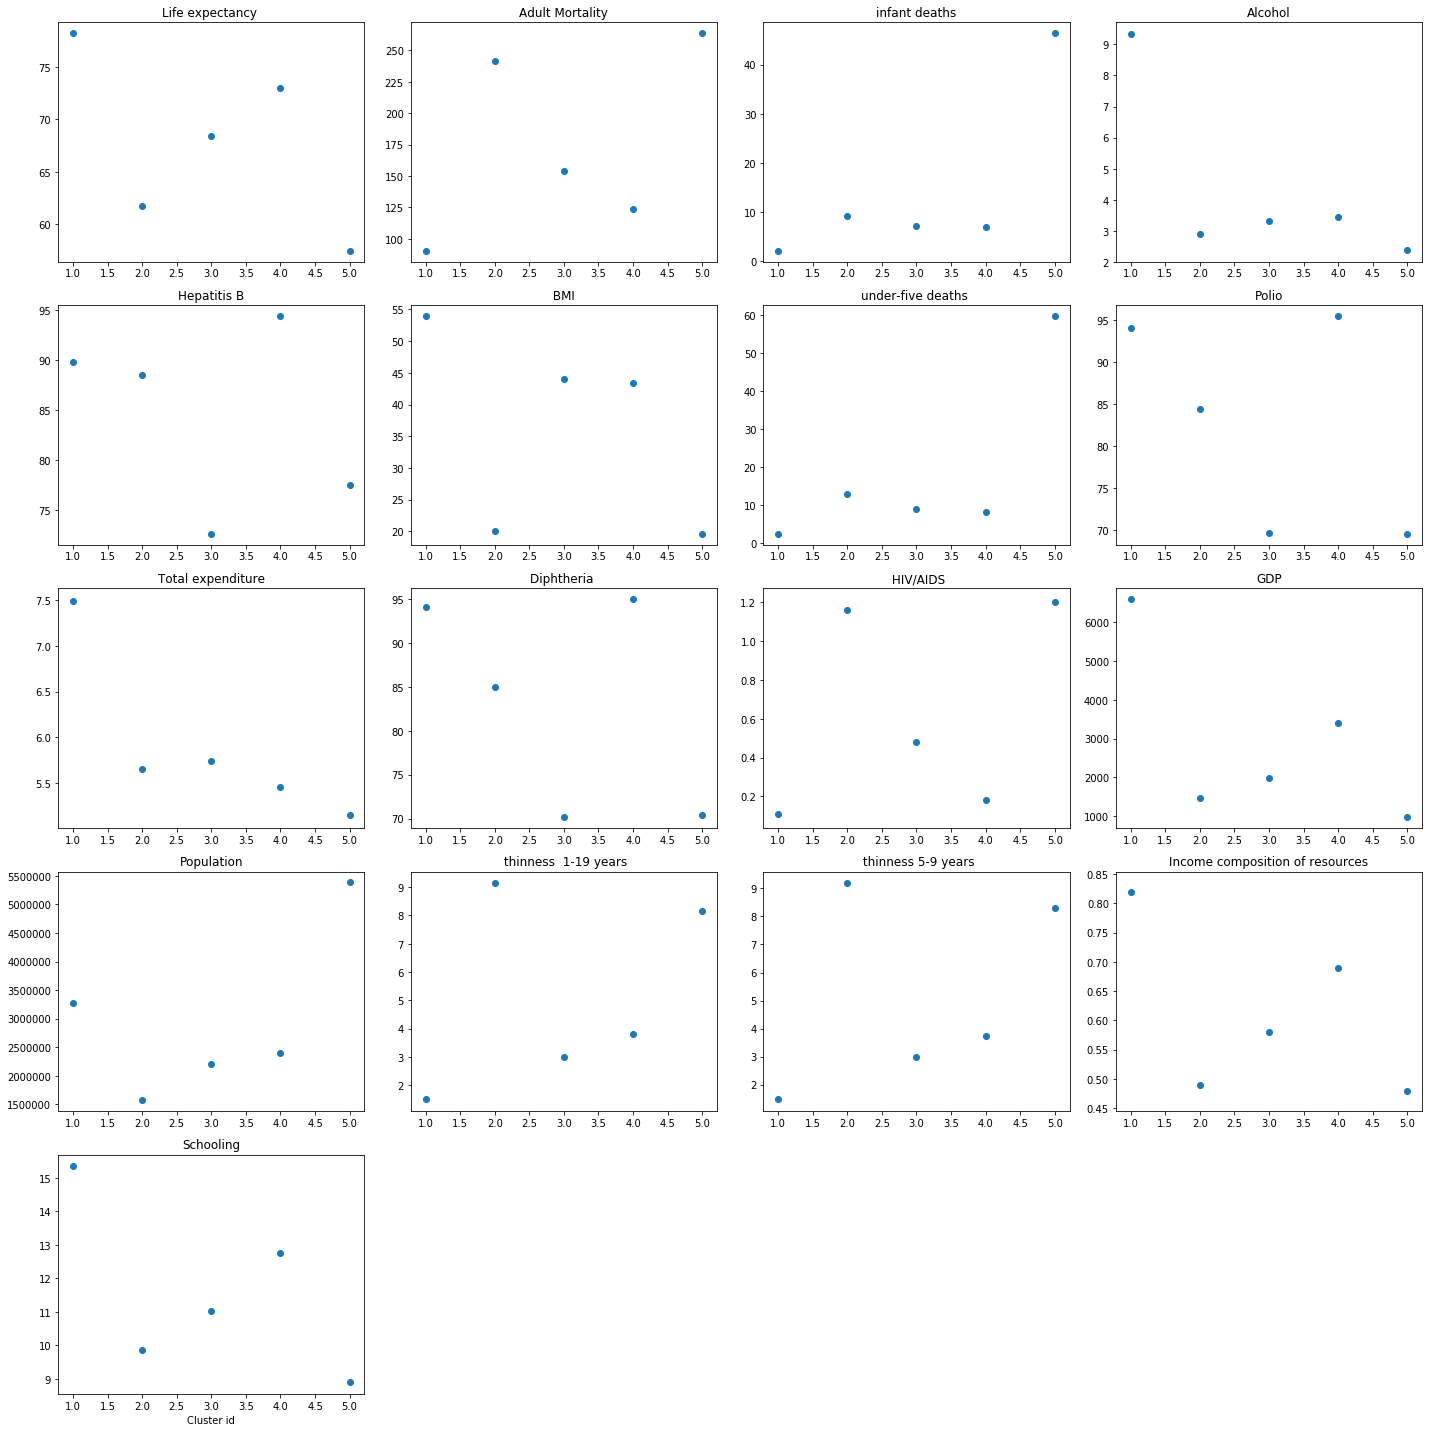

In [349]:
%matplotlib inline
plt.figure(figsize=(20, 20))
i = 0
for col in cluster_summary.columns:
    i += 1
    plt.subplot(5, 4, i)
    plt.scatter(range(1, k+1), cluster_summary[col])
    plt.title(col)
plt.xlabel("Cluster id")
save_fig("kmeans_cluster_attributes_comp")
plt.show()

# Principal component analysis

In [351]:
from sklearn.decomposition import PCA

In [360]:
#16 total features
print("Total numeric features")
data_num_drop.info()

Total numeric features
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 16 columns):
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
Hepatitis B                        2938 non-null float64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2938 non-null float64
Population                         2938 non-null float64
 thinness  1-19 years              2938 non-null float64
 thinness 5-9 years                2938 non-null float64
Income composition of resources    2938 non-null float64
Schooling          

In [352]:
pca_model = PCA()
y_pca = pca_model.fit_transform(data_num_drop_scaled)

In [369]:
pca_exp_ratio = pca_model.explained_variance_ratio_
pca_exp_var = pca_model.explained_variance_

In [381]:
print("Explained variance by principal components:")
acc = 0
pca_exp_ratio_acc = []
for i in range(len(pca_exp_ratio)):
    acc += pca_exp_ratio[i]
    print("PC" + str(i + 1), acc)
    pca_exp_ratio_acc.append(acc)
#top 7 components are required to achieve explained variance > 80%

Explained variance by principal components:
PC1 0.4213845349701042
PC2 0.5289984318135044
PC3 0.6155498766354988
PC4 0.6865226061909595
PC5 0.7468892596389503
PC6 0.7977317748758083
PC7 0.8391130663068973
PC8 0.8735670263231305
PC9 0.9064241734679248
PC10 0.9354206627384677
PC11 0.9592827515609149
PC12 0.9800539174481899
PC13 0.9887557648556828
PC14 0.9960897852812163
PC15 0.9996328324285343
PC16 0.9999999999999999


In [373]:
print("Eigenvalues:")
print(pca_exp_var)
#top 4 components have eigenvalues > 1

Eigenvalues:
[6.74444815e+00 1.72240860e+00 1.38529463e+00 1.13595031e+00
 9.66195317e-01 8.13757220e-01 6.62326097e-01 5.51451056e-01
 5.25893351e-01 4.64101794e-01 3.81923416e-01 3.32451810e-01
 1.39276964e-01 1.17384281e-01 5.67080559e-02 5.87668138e-03]


Saving figure pca_elbow


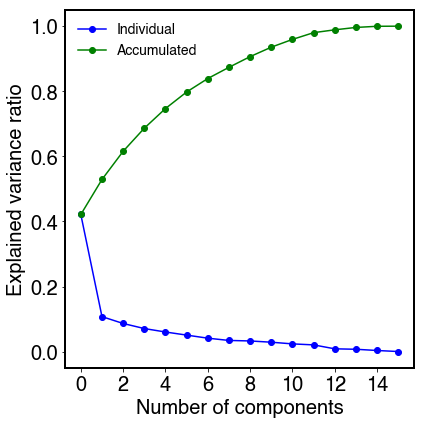

In [380]:
plt.figure(figsize=(6, 6))
plt.plot(pca_exp_ratio, "o-", color="b", label="Individual")
plt.plot(pca_exp_ratio_acc, "o-", color="g", label="Accumulated")
ax=plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_xlabel('Number of components', fontdict=font)
ax.set_ylabel('Explained variance ratio', fontdict=font)
plt.legend()
plt.legend(prop=fontdict,loc=2, frameon=False)
save_fig("pca_elbow")
plt.show()


To sum up:

1. Elbow is at components = 3
2. Top 7 components are required to achieve explained variance > 80%
3. Top 4 components have eigenvalues > 1

Therefore, 7 components should be selected. This number is comparable with the orginal number of features (16). Therefore, PCA is not used in this study.

## Build PCA

In [384]:
n_comp = 0.8
pca_model = PCA(n_components=n_comp)
data_num_drop_scaled_pca = pca_model.fit_transform(data_num_drop_scaled)

In [388]:
print("Total number of components")
print(pca_model.n_components_)
print("Explained variance ratio")
print(np.sum(pca_model.explained_variance_ratio_))

Total number of components
7
Explained variance ratio
0.8391130663068973
